### Exploring and Pre-Processing Data

In [55]:
# imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [56]:
raw_data_path = os.path.join(os.path.pardir,'Datasets','titanic')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [57]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [58]:
df = pd.concat((train_df, test_df),axis=0)

/Users/maialaa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [59]:
df.head() #Data without preprocessing

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [107]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### First:Embarked

In [61]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [62]:
df.Embarked.isnull().value_counts()

False    1307
True        2
Name: Embarked, dtype: int64

In [63]:
#embarked column only have two missing values

In [64]:
#people embarked at differrent points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [109]:
#which embarked points have higher no of survived
Sur=pd.crosstab(df.Survived,df.Embarked)
Sur

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,219


In [112]:
df.groupby(['Survived','Embarked']).count()

Age  Cabin  Fare  Name  Parch  Pclass  Sex  SibSp  Ticket
Survived Embarked                                                           
0.0      C          75     17    75    75     75      75   75     75      75
         Q          47      2    47    47     47      47   47     47      47
         S         427     49   427   427    427     427  427    427     427
1.0      C          93     52    93    93     93      93   93     93      93
         Q          30      2    30    30     30      30   30     30      30
         S         219     82   219   219    219     219  219    219     219

In [66]:
df.loc[df.Embarked.isnull(),'Embarked']='S'

In [67]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### Second:Fare

In [69]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701


In [70]:
#fill the missing value with the median:
median=df.loc[(df.Pclass==3) & (df.Embarked=='S'),'Fare'].median()

In [71]:
df.Fare.fillna(median,inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [73]:
pd.options.display.max_rows=15

### Feature:Age

In [74]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1.0,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1.0,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0.0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1.0,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0.0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1.0,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,NaN,364498


In [75]:
#263 rows missing in Age column

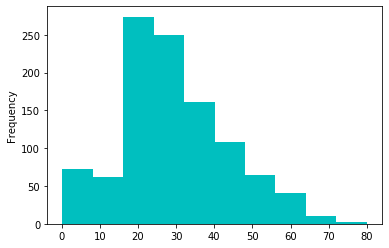

In [82]:
df.Age.plot(kind='hist',bins=10,color='c');

In [83]:
df.Age.median()

29.881137667304014

In [85]:
median_age=df.groupby('Sex').Age.transform('median')

In [86]:
df.Age.fillna(median_age,inplace=True)

In [90]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
6,28.0,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463
...,...,...,...,...,...,...,...,...,...,...,...
1303,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1,female,1,NaN,19928


### Feature:Survived

In [102]:
med_Surv=df.groupby("Sex").Survived.median()

In [105]:
df.Survived.fillna(med_Surv,inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### working with outliers values

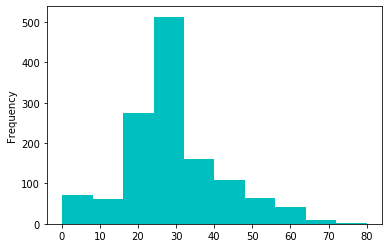

In [115]:
df.Age.plot(kind='hist',bins=10,color='c')

In [117]:
df.loc[df.Age>70] #only these values have max age

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0.0,PC 17754
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0.0,370369
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0.0,PC 17609
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1.0,27042
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0.0,347060
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,NaN,19877


### Fare feature

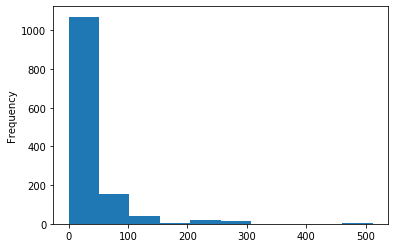

In [119]:
df.Fare.plot(kind='hist')

In [120]:
df.loc[df.Fare==df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1.0,PC 17755
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1.0,PC 17755
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1.0,PC 17755
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,NaN,PC 17755


In [125]:
#To deal with these values we can remove it or applying log fn to them ,to not affect the predictive model 

In [126]:
fare_log=np.log(df.Fare)

/Users/maialaa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [127]:
df['fare_log']=fare_log

In [129]:
df.drop(columns='Fare',inplace=True)

In [130]:
df.head()

,Age,Cabin,Embarked,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,fare_log
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,1.981001
2,38.0,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,4.266662
3,26.0,NaN,S,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,2.070022
4,35.0,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,3.972177
5,35.0,NaN,S,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,2.085672


#### Feature Engineerring
###### Age survived

In [132]:
#1st age state
df['AgeState']=np.where(df['Age']>=18,'Adult','children')

In [133]:
df['AgeState'].value_counts()

Adult       1155
children     154
Name: AgeState, dtype: int64

In [134]:
pd.crosstab(df.AgeState,df.Survived)

Survived,0.0,1.0
AgeState,,
Adult,497,281
children,52,61


In [135]:
#so as we see that survival rate in children is more than that in Adult

##### Family size

In [136]:
df['FamilySize']=df.Parch+df.SibSp+1 #for both relative adding to the one himself

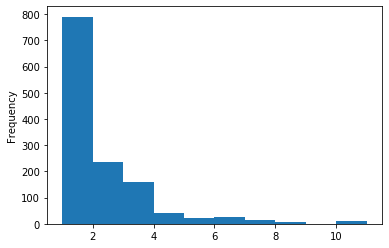

In [137]:
df['FamilySize'].plot(kind='hist')

In [138]:
#As we see the one which has no relatives was near from surviving than the 
#one having family

In [140]:
df.loc[df.FamilySize==df.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0.0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0.0,11,CA. 2343
202,"Sage, Mr. Frederick",0.0,11,CA. 2343
325,"Sage, Mr. George John Jr",0.0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0.0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0.0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0.0,11,CA. 2343
1080,"Sage, Miss. Ada",NaN,11,CA. 2343
1234,"Sage, Mr. John George",NaN,11,CA. 2343


In [141]:
#as we see most likely that the null values of survived column are zeros too

In [142]:
pd.crosstab(df.Survived,df.FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,374,72,43,8,12,19,8,6,7
1.0,163,89,59,21,3,3,4,0,0


In [144]:
df.Age.isnull().value_counts()

False    1309
Name: Age, dtype: int64

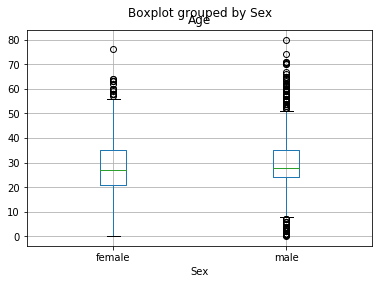

In [149]:
df[df.Age.notnull()].boxplot('Age','Sex');

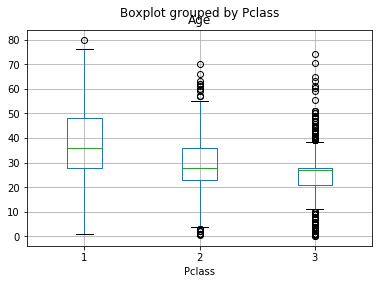

In [151]:
df[df.Age.notnull()].boxplot('Age','Pclass')